This is the Kaggle Machine Learning Dataset 2017, a survey carried out by kaggle. My main aim is to analyze this dataset and perform machine learning on how Age, Education and Industry affect female Data Scientists' wages in the Uk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline()
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
Emp = pd.read_csv('freeFormResponses.csv')
Wom = pd.read_csv('SurveySchema.csv')
Dat = pd.read_csv('multipleChoiceResponses.csv')

C:\Users\Rita\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning:

Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Rita\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning:

Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
Emp.head()

,Q11_OTHER_TEXT,Q12_OTHER_TEXT,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q15_OTHER_TEXT,...,Q34_OTHER_TEXT,Q35_OTHER_TEXT,Q36_OTHER_TEXT,Q37_OTHER_TEXT,Q38_OTHER_TEXT,Q42_OTHER_TEXT,Q49_OTHER_TEXT,Q50_OTHER_TEXT,Q6_OTHER_TEXT,Q7_OTHER_TEXT
0,Select any activities that make up an importan...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,...,During a typical data science project at work ...,What percentage of your current machine learni...,On which online platforms have you begun or co...,On which online platform have you spent the mo...,Who/what are your favorite media sources that ...,What metrics do you or your organization use t...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...
1,NaN,NaN,NaN,NaN,NaN,"Jupyter Notebooks, Pycharm, Intelijidea",NaN,NaN,NaN,NaN,...,0.0,NaN,mlcourse.ai,NaN,ods.ai,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,anaconda,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Wom.head()

,2018 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q47,Q48,Q49,Q5,Q50,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
0,Question:,What is your gender? - Selected Choice,Does your current employer incorporate machine...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,What programming languages do you use on a reg...,What specific programming language do you use ...,...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,Which best describes your undergraduate major?...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Duration (in seconds)
1,# of Respondents:,23860,20670,19518,19199,19117,18971,18864,18828,15223,...,13418,13369,12891,22948,12814,22901,21686,21102,20186,23860
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selecte...,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,If What is the highest level of formal educati...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
Wom.describe()

,2018 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q47,Q48,Q49,Q5,Q50,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
count,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
unique,12,3,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,3
top,If On which online platforms have you begun or...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,10,8,8,9,9,9,9,9,9,...,7,7,7,8,7,8,8,8,8,10


In [8]:
Dat.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [7]:
Dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Columns: 395 entries, Time from Start to Finish (seconds) to Q50_OTHER_TEXT
dtypes: object(395)
memory usage: 71.9+ MB


In [8]:
Dat.keys()

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q1_OTHER_TEXT', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q6_OTHER_TEXT', 'Q7',
       ...
       'Q49_OTHER_TEXT', 'Q50_Part_1', 'Q50_Part_2', 'Q50_Part_3',
       'Q50_Part_4', 'Q50_Part_5', 'Q50_Part_6', 'Q50_Part_7', 'Q50_Part_8',
       'Q50_OTHER_TEXT'],
      dtype='object', length=395)

Now, let's fetch the dataframe for those in the UK

In [59]:
Ukmd = Dat[Dat.Q3 == 'United Kingdom of Great Britain and Northern Ireland']

In [10]:
Ukmd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 25 to 23858
Columns: 395 entries, Time from Start to Finish (seconds) to Q50_OTHER_TEXT
dtypes: object(395)
memory usage: 2.1+ MB


In [11]:
Ukmd.isnull().sum()

Time from Start to Finish (seconds)      0
Q1                                       0
Q1_OTHER_TEXT                            0
Q2                                       0
Q3                                       0
Q4                                       8
Q5                                      23
Q6                                      16
Q6_OTHER_TEXT                            0
Q7                                      50
Q7_OTHER_TEXT                            0
Q8                                      65
Q9                                      86
Q10                                     77
Q11_Part_1                             343
Q11_Part_2                             534
Q11_Part_3                             511
Q11_Part_4                             416
Q11_Part_5                             565
Q11_Part_6                             626
Q11_Part_7                             677
Q11_OTHER_TEXT                           0
Q12_MULTIPLE_CHOICE                    100
Q12_Part_1_

we've got quite a lot of null values in the dataframe, we will clean them up later especially the data we actually need for our analysis

In [12]:
Ukmd.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q1_OTHER_TEXT', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q6_OTHER_TEXT', 'Q7',
       ...
       'Q49_OTHER_TEXT', 'Q50_Part_1', 'Q50_Part_2', 'Q50_Part_3',
       'Q50_Part_4', 'Q50_Part_5', 'Q50_Part_6', 'Q50_Part_7', 'Q50_Part_8',
       'Q50_OTHER_TEXT'],
      dtype='object', length=395)

In [60]:
Ukmd['Gender'] = Ukmd['Q1']
Ukmd['Age'] = Ukmd['Q2']
Ukmd['Education'] = Ukmd['Q4']
Ukmd['Job Title'] = Ukmd['Q6']
Ukmd['Industry'] = Ukmd['Q7']
Ukmd['Compensation'] = Ukmd['Q9']

In [14]:
Ukmd.groupby('Gender').count()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,Age,Education,Job Title,Industry,Compensation
Gender,,,,,,,,,,,,,,,,,,,,,
Female,131,131,131,131,131,130,129,130,131,126,...,31,4,20,11,131,131,130,130,126,121
Male,554,554,554,554,554,547,534,539,554,512,...,103,29,78,24,554,554,547,539,512,481
Prefer not to say,12,12,12,12,12,12,11,12,12,10,...,2,0,0,2,12,12,12,12,10,10
Prefer to self-describe,5,5,5,5,5,5,5,5,5,4,...,2,0,0,1,5,5,5,5,4,4


In [15]:
Ukmd['Gender'].iplot(kind = 'hist', xTitle='Gender', yTitle ='Total Count', title = 'Gender Count across the Data')

Most Data Scientist in the UK are males, just a small percentage are females. 

Text(0.5, 0, 'Age')

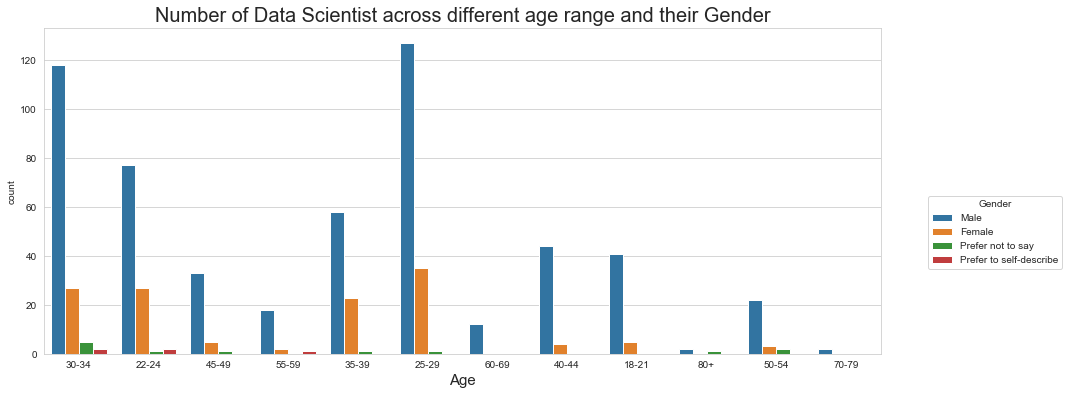

In [16]:
plt.figure(figsize = (15,6))
sns.countplot(x ='Age', data = Ukmd, hue = 'Gender')
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Gender')
plt.title('Number of Data Scientist across different age range and their Gender', fontsize =20)
plt.xlabel('Age', fontsize=15)

Since we are interested in female Data Scientist.At age 25-29, 30-34, 22-24,35-39 we tend to have more data scientists in decreasing order

In [17]:
Ukmd.groupby('Q4').count()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,...,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,Gender,Age,Education,Job Title,Industry,Compensation
Q4,,,,,,,,,,,,,,,,,,,,,
Bachelor’s degree,171,171,171,171,171,170,168,171,160,171,...,12,25,8,171,171,171,171,168,160,154
Doctoral degree,177,177,177,177,177,176,174,177,170,177,...,4,24,10,177,177,177,177,174,170,160
Master’s degree,292,292,292,292,292,291,291,292,272,292,...,15,38,18,292,292,292,292,291,272,255
No formal education past high school,11,11,11,11,11,0,11,11,11,11,...,0,1,1,11,11,11,11,11,11,11
Professional degree,14,14,14,14,14,14,14,14,14,14,...,0,3,0,14,14,14,14,14,14,14
Some college/university study without earning a bachelor’s degree,29,29,29,29,29,28,28,29,25,29,...,2,7,1,29,29,29,29,28,25,22


Let's proceed with cleaning the data, especially the columns we need for our analysis

In [61]:
#There were 8 missing value in the Education Label, it is best to drop them so they will not affect our analysis
Ukmd['Education'].dropna(how = 'any', inplace = True)

In [62]:
Ukmd['Education'].isnull().sum()

0

Let us see the form of Education Data Scientist in the field has

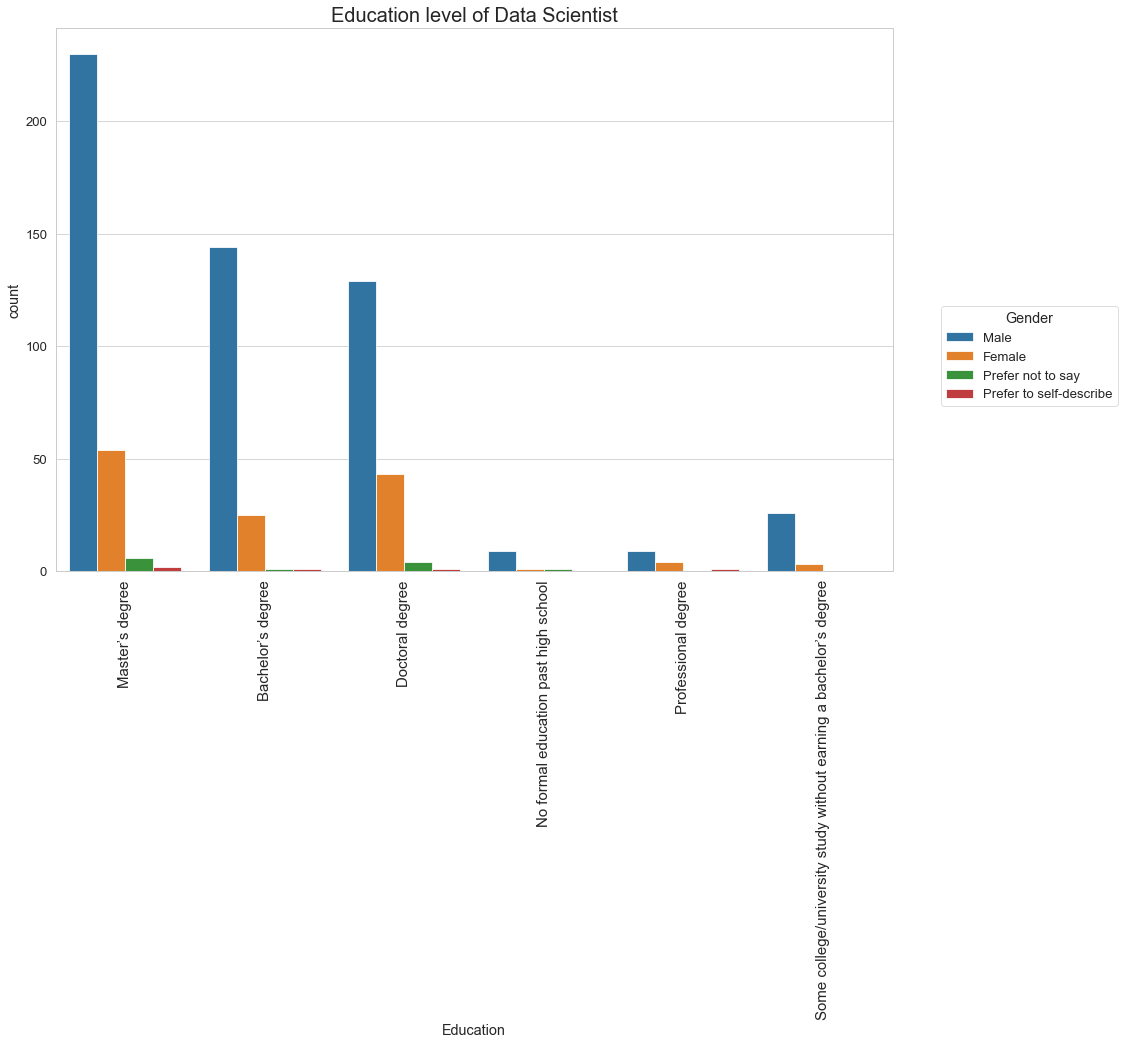

In [65]:
plt.figure(figsize = (15,10))
g = sns.countplot(x = Ukmd['Education'], data = Ukmd, hue = 'Q1')
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Gender')
plt.title('Education level of Data Scientist', fontsize = 20)
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize =15)
sns.set_context("paper", font_scale=1.5)

In [66]:
Ukmd['Compensation'].isnull().sum()

86

We noticed that Compensation is a string (70-80,000), now we are going to get the avearge of the values and convert the numbers to float. Let's proceed to create a function that will handle that for us

# To convert to float (this function also handles the Age conversion from string to int

In [67]:
def to_Float(x,y,dp):
    '''
    x string or nan value to perform operation on
    y multiplier for lower range of value of format min-max
    dp True if float of 2dp else return integer
    '''
    if(pd.isnull(x)):
        return x
    elif "I do not wish" in x:
        return x
    elif "+" in x:
        val = float(x.replace('+','').replace(',',''))
        return round(val,2) if dp else int(val)
    else:
        a = float(x.split('-')[0])*y
        b = float(x.split('-')[1].replace(',',''))
        c = a+b
        return round(c/2,2) if dp else int(c/2)

In [69]:
Ukmd['CompensationAmount'] = Ukmd['Compensation'].apply(to_Float, args = [1000,True])

In [70]:
Ukmd['CompensationAmount']

25                                                   75000
63                                                     NaN
101                                                  45000
520                                                   5000
710                                                  35000
714                                                  45000
727                                                 112500
756                                                  55000
831                                                 175000
848                                                 112500
870                                                  15000
896                                                  45000
962                                                  25000
1001                                                112500
1040                                                 45000
1101                                                 45000
1126     I do not wish to disclose my approximate yearl.

Now, let us see the percentages of people who gave the value of thier wages, those that did not want to disclose and the missing values in a pie chart. Though I have read that the pie chart is not the best way to visualize your data but I want to use it to visualize this analysis

In [71]:
Nodisclosure = sum(Ukmd['CompensationAmount'] == 'I do not wish to disclose my approximate yearly compensation')

In [72]:
NaNum = sum(Ukmd['CompensationAmount'].isnull())

In [73]:
PaidWorkers = len(Ukmd['CompensationAmount']) - Nodisclosure - NaNum

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

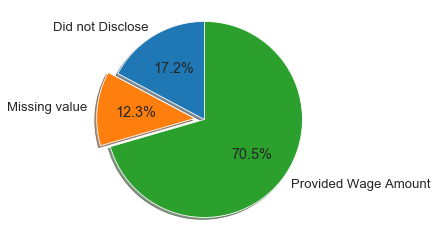

In [74]:
labels = ['Did not Disclose', 'Missing value', 'Provided Wage Amount']
sizes = [Nodisclosure, NaNum, PaidWorkers]
# only "explode" the 2nd slice
explode = (0, 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout

From the pie chart above, 70.5% of people disclosed their salaries, 17.2% preferred not to say and 12.3% of the people did not provide any information concerning their wages this is okay because a number said they were unemployed or are students 

In [75]:
#Apply the to_Float() to get the average of the Age range and convert to int

Ukmd['Dage'] = Ukmd['Age'].apply(to_Float, args = [1,False])

In [108]:
df = Ukmd[['CompensationAmount', 'Job Title', 'Dage', 'Education', 'Industry','Gender']].dropna(thresh =5)
df.head()

,CompensationAmount,Job Title,Dage,Education,Industry,Gender
25,75000,Data Scientist,32,Master’s degree,Online Service/Internet-based Services,Male
101,45000,Data Analyst,47,Doctoral degree,Other,Female
520,5000,Student,23,Master’s degree,Academics/Education,Male
710,35000,Data Analyst,23,Master’s degree,Computers/Technology,Female
714,45000,Data Scientist,23,Bachelor’s degree,Computers/Technology,Female


From the data, we discovered that some people said that they preferred not to say, dropping these will affect our analysis so we are going to fill in the mean value of the wage for their Job Title.

In [77]:
df['Job Title'].value_counts()

Data Scientist             161
Student                    103
Software Engineer           70
Other                       62
Data Analyst                60
Research Scientist          48
Consultant                  32
Manager                     21
Business Analyst            17
Data Engineer               17
Chief Officer               13
Research Assistant          11
Product/Project Manager     10
Statistician                 9
Marketing Analyst            5
Salesperson                  4
DBA/Database Engineer        4
Principal Investigator       4
Developer Advocate           1
Name: Job Title, dtype: int64

We are about to clean the data but first, let's calculate the mean of those that gave their wages.

In [109]:
boxdf = df[['Job Title','CompensationAmount']]

In [79]:
boxdf.head(20)

,Job Title,CompensationAmount
25,Data Scientist,75000
101,Data Analyst,45000
520,Student,5000
710,Data Analyst,35000
714,Data Scientist,45000
727,Product/Project Manager,112500
756,Data Analyst,55000
831,Other,175000
848,Data Scientist,112500
870,Student,15000


Let's make the compensation amount column numeric so the string and null values in the column does not affect us.

In [110]:
boxdf['CompensationAmount'] = pd.to_numeric(boxdf['CompensationAmount'], errors = 'coerce').astype(float)

In [111]:
boxdf.head()

,Job Title,CompensationAmount
25,Data Scientist,75000.0
101,Data Analyst,45000.0
520,Student,5000.0
710,Data Analyst,35000.0
714,Data Scientist,45000.0


In [112]:
allMean = boxdf.groupby('Job Title').mean()

In [113]:
allMean.apply(round, args = [2])

,CompensationAmount
Job Title,
Business Analyst,63888.89
Chief Officer,143750.00
Consultant,73809.52
DBA/Database Engineer,78333.33
Data Analyst,54953.70
Data Engineer,84464.29
Data Scientist,68258.62
Developer Advocate,175000.00
Manager,115208.33


Now that we have our mean salary for each salary group, we will move ahead to assign it to those who did not share their salary. 

Let's create a function to handle that

In [114]:
def assign_invalid_compensation(x,y):
#     print(x)
    if 'I do not' in str(x['CompensationAmount']):
        x['CompensationAmount'] = y.loc[x['Job Title'],'CompensationAmount']
#     input()
    return x

In [115]:
df['CompensationAmount'] = df.apply(assign_invalid_compensation, args=[allMean], axis=1)

Now, the null values. Let's proceed by dropping them

In [116]:
df['CompensationAmount'].isnull().sum()

36

In [117]:
df['CompensationAmount'].head()

25     75000
101    45000
520     5000
710    35000
714    45000
Name: CompensationAmount, dtype: object

In [118]:
df['CompensationAmount'].dropna(inplace = True)

In [119]:
df['CompensationAmount'].isnull().sum()

0

In [90]:
plt.figure(figsize = (10,5))
df['CompensationAmount'].iplot(kind = 'hist', xTitle = 'Compensation Amount', yTitle = 'Number of People', title = 'Distribution of Compensation Amount in USD')

<Figure size 720x360 with 0 Axes>

Looking at the distribution of the compensation amount, most people earn between 50 - 59.9K USD. very few peolpe earn above that. There are outliers mostly from 180K to 500K.

Now let us analyse our data based on Job Title.

C:\Users\Rita\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 1.0, 'Job Title VS Compensation Amount')

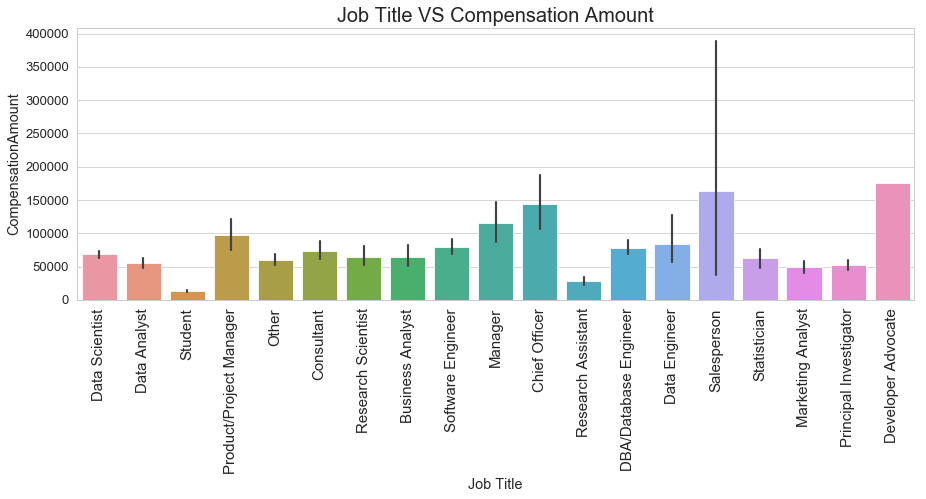

In [91]:
plt.figure(figsize = (15,5))
g = sns.barplot(x= 'Job Title', y = 'CompensationAmount', data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize =15)
plt.title('Job Title VS Compensation Amount', fontsize = 20)


There is a lot of variance for the Sales Person Job title. Developer Advocate, Chief Officer and Manager are rewarded handsomely. 

Now, let's see which industry pays best

Text(0.5, 1.0, 'Compensation Amount VS Industry')

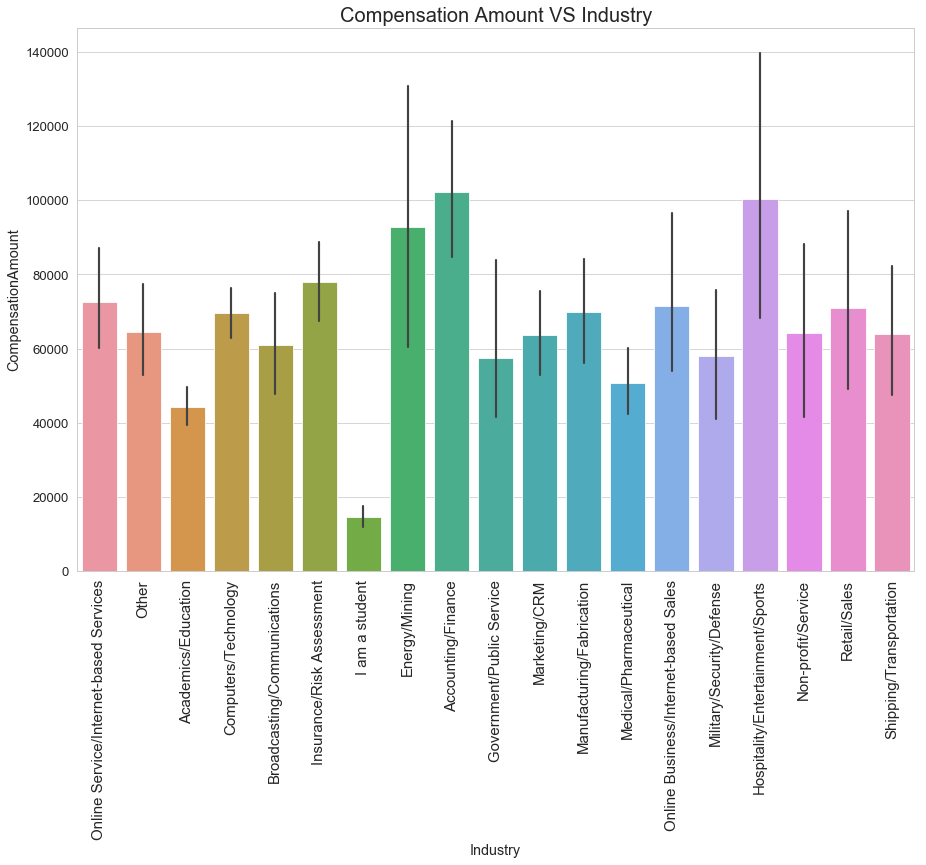

In [92]:
plt.figure(figsize = (15,10))
g = sns.barplot(x= 'Industry', y = 'CompensationAmount', data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize =15)
plt.title('Compensation Amount VS Industry', fontsize = 20)

Accounting and Finance, Hospitality/Entertainment/Sports and Energy/Minning industry pays best while Academics/Education pays the least. The students category have the least Compensation amount though, but we know students earn little or nothing so for the purpose of this particular analysis, we are picking Academics/Education field as the least.

In [93]:
#df['CompensationAmount'] = df['CompensationAmount'].astype(float)

Now that we have done some exploratory data analysis, and cleaned all the data we need, let us draw our focus back to our main goal and interest. "The Female Technocrats"....

Let's begin by extracting only females from our dataframe.

In [122]:
femaleDs = df[df['Gender'] == 'Female']

In [123]:
femaleDs.dropna(inplace = True)

In [124]:
femaleDs.isnull().sum()

CompensationAmount    0
Job Title             0
Dage                  0
Education             0
Industry              0
Gender                0
dtype: int64

In [125]:
femaleDs.head()

,CompensationAmount,Job Title,Dage,Education,Industry,Gender
101,45000,Data Analyst,47,Doctoral degree,Other,Female
710,35000,Data Analyst,23,Master’s degree,Computers/Technology,Female
714,45000,Data Scientist,23,Bachelor’s degree,Computers/Technology,Female
962,25000,Data Scientist,27,Master’s degree,Online Service/Internet-based Services,Female
1101,45000,Other,47,Doctoral degree,Academics/Education,Female


Text(0.5, 1.0, 'Industry VS Female Wages')

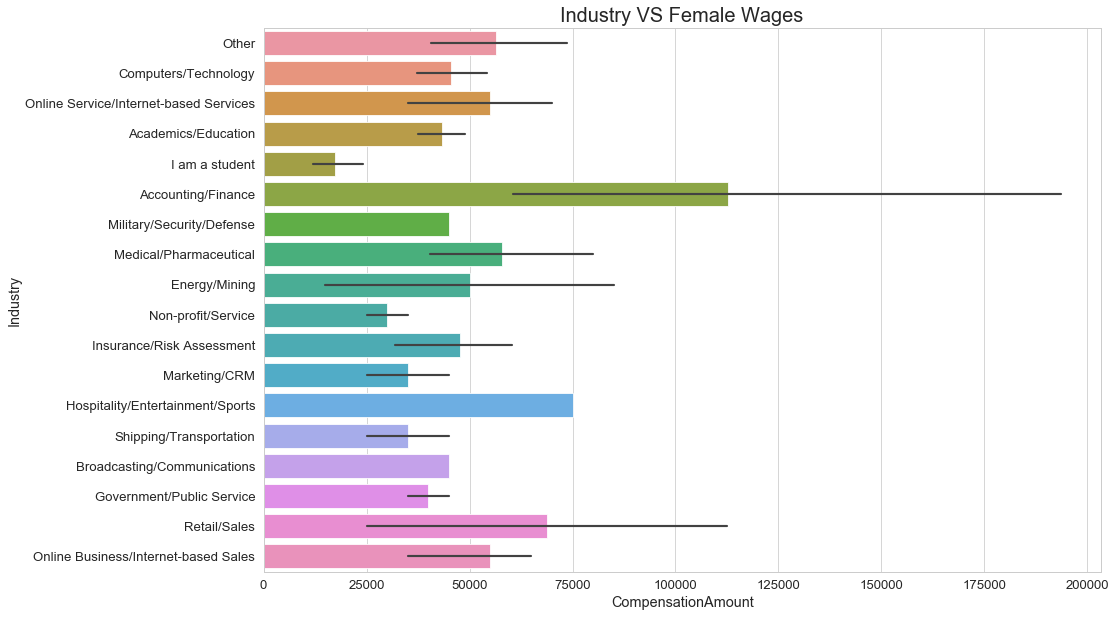

In [105]:
plt.figure(figsize = (15,10))
sns.barplot(x=df['CompensationAmount'], y = 'Industry', data = femaleDs)
plt.title('Industry VS Female Wages', fontsize=20)

It is obvious that women in Accounting/Finance earn higher though there is a significant amount of error maybe due to outliers. Women in Hospitality/Entertainment/Sports earn high wages too, we can see that there are no errors.

In [126]:
femaleDs.head()

,CompensationAmount,Job Title,Dage,Education,Industry,Gender
101,45000,Data Analyst,47,Doctoral degree,Other,Female
710,35000,Data Analyst,23,Master’s degree,Computers/Technology,Female
714,45000,Data Scientist,23,Bachelor’s degree,Computers/Technology,Female
962,25000,Data Scientist,27,Master’s degree,Online Service/Internet-based Services,Female
1101,45000,Other,47,Doctoral degree,Academics/Education,Female


C:\Users\Rita\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



Text(0.5, 1.0, 'Relationship of Education Level to Compensation Amount')

<Figure size 720x360 with 0 Axes>

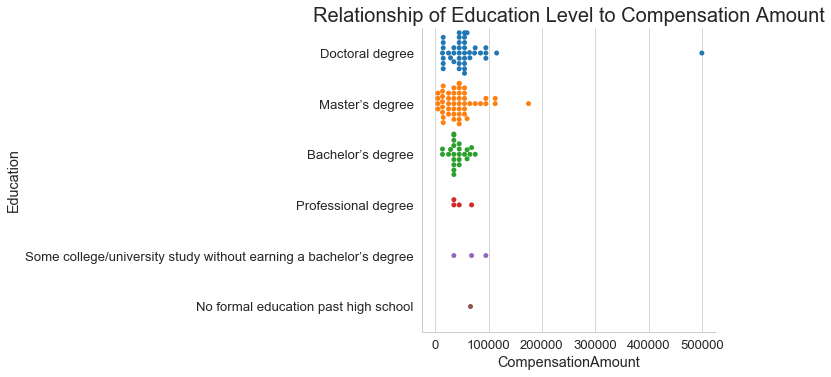

In [137]:
plt.figure(figsize = (10,5))
sns.catplot(x = 'CompensationAmount', y = 'Education', data = femaleDs, kind='swarm')
plt.tight_layout
plt.title('Relationship of Education Level to Compensation Amount', fontsize = 20)

From this graph, it shows that those with Doctoral degree earn higher with one person earning up to 500,000 USD as well as those with Master's degree with the highest paid person in the category earning a little below 200,000 USD.

Text(0.5, 1.0, 'Plot showing how Age affect the Wages of Women in Data Science Field')

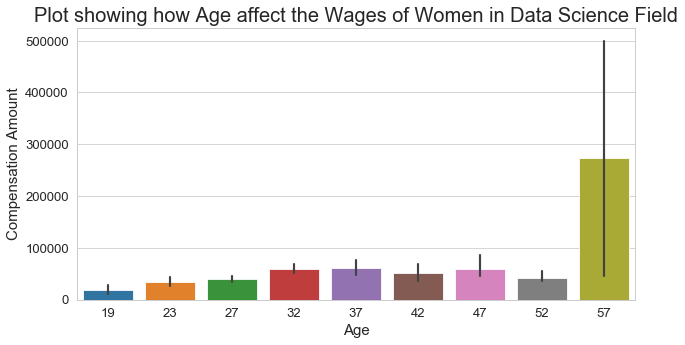

In [140]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Dage', y = 'CompensationAmount', data = femaleDs)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Compensation Amount', fontsize = 15)
plt.title('Plot showing how Age affect the Wages of Women in Data Science Field', fontsize = 20)

There is an outlier with women who are 57, this is because only one person said she earns 500,000+ USD and that explains the error we are seeing from the plot above. However, women between 32 - 47 earn higher than others.

Let's see how heatmap plot will interprete this data

Text(0.5, 20.700000000000003, 'Compensation Amount')

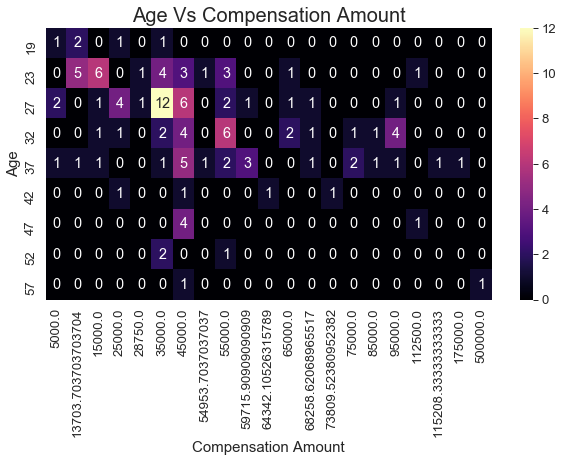

In [146]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(femaleDs['Dage'],femaleDs['CompensationAmount']),cmap='magma',annot=True)
plt.title('Age Vs Compensation Amount', fontsize =20)
plt.ylabel('Age', fontsize = 15)
plt.xlabel('Compensation Amount', fontsize = 15)

Now, only 2 females are 57 years of age, with one earning 45,000 and the other earning 500, 000, this explains why the barplot showed at lot of variance at age 57. Most female earn 35,000 and are 27 years old.

Now that we have visualize how Age, Education and Industry can affect a woman's wages in this field. Let's go ahead and do some feature engineering and perform some machine learning Algorithm

In [147]:
femaleDs['Education'].value_counts()

Master’s degree                                                      49
Doctoral degree                                                      40
Bachelor’s degree                                                    24
Professional degree                                                   4
Some college/university study without earning a bachelor’s degree     3
No formal education past high school                                  1
Name: Education, dtype: int64

Let's categorize our Education and Industry column by setting dummy variables so our data will be fit for training

In [150]:
'''
assignnum = { 'Doctoral degree':1,
             'Master’s degree':2,
            'Bachelor’s degree':3,                                                   
            'Professional degree':4,                                                  
            'Some college/university study without earning a bachelor’s degree':5,   
            'No formal education past high school':6
    
}
'''

"\nassignnum = { 'Doctoral degree':1,\n             'Master’s degree':2,\n            'Bachelor’s degree':3,                                                   \n            'Professional degree':4,                                                  \n            'Some college/university study without earning a bachelor’s degree':5,   \n            'No formal education past high school':6\n    \n}\n"

In [293]:
#femaleDs['Edu'] = femaleDs['Education'].map(assignnum)

In [151]:
femaleDs['Industry'].value_counts()

Academics/Education                       25
Computers/Technology                      23
I am a student                            16
Accounting/Finance                        12
Medical/Pharmaceutical                     8
Other                                      7
Insurance/Risk Assessment                  6
Government/Public Service                  4
Online Service/Internet-based Services     4
Online Business/Internet-based Sales       3
Shipping/Transportation                    2
Retail/Sales                               2
Marketing/CRM                              2
Energy/Mining                              2
Non-profit/Service                         2
Broadcasting/Communications                1
Hospitality/Entertainment/Sports           1
Military/Security/Defense                  1
Name: Industry, dtype: int64

In [152]:
'''
assignind = {
'Academics/Education':1,
'Computers/Technology':2,
'I am a student':3,
'Accounting/Finance':4,
'Medical/Pharmaceutical':5,
'Other':6,                                      
'Insurance/Risk Assessment':7,                  
'Government/Public Service':8,             
'Online Service/Internet-based Services':9,
'Energy/Mining':10,
'Retail/Sales':11,
'Online Business/Internet-based Sales':12,
'Shipping/Transportation':13,  
'Non-profit/Service':14,
'Marketing/CRM':15, 
'Military/Security/Defense':16,
'Broadcasting/Communications':17,
'Hospitality/Entertainment/Sports':18
}
'''

"\nassignind = {\n'Academics/Education':1,\n'Computers/Technology':2,\n'I am a student':3,\n'Accounting/Finance':4,\n'Medical/Pharmaceutical':5,\n'Other':6,                                      \n'Insurance/Risk Assessment':7,                  \n'Government/Public Service':8,             \n'Online Service/Internet-based Services':9,\n'Energy/Mining':10,\n'Retail/Sales':11,\n'Online Business/Internet-based Sales':12,\n'Shipping/Transportation':13,  \n'Non-profit/Service':14,\n'Marketing/CRM':15, \n'Military/Security/Defense':16,\n'Broadcasting/Communications':17,\n'Hospitality/Entertainment/Sports':18\n}\n"

In [296]:
#femaleDs['Ind'] = femaleDs['Industry'].map(assignind)

In [153]:
femaleDs.isnull().sum()

CompensationAmount    0
Job Title             0
Dage                  0
Education             0
Industry              0
Gender                0
dtype: int64

In [154]:
femaleDs.head()

,CompensationAmount,Job Title,Dage,Education,Industry,Gender
101,45000,Data Analyst,47,Doctoral degree,Other,Female
710,35000,Data Analyst,23,Master’s degree,Computers/Technology,Female
714,45000,Data Scientist,23,Bachelor’s degree,Computers/Technology,Female
962,25000,Data Scientist,27,Master’s degree,Online Service/Internet-based Services,Female
1101,45000,Other,47,Doctoral degree,Academics/Education,Female


Job title really do not have so much weight on wage as it differs from company to company. So using Age, Education and Industry is more ideal to predict the wage

In [155]:
dummyEdu = pd.get_dummies(femaleDs['Education'])

In [156]:
dummyInd = pd.get_dummies(femaleDs['Industry'])

In [157]:
femaleDs = pd.concat([femaleDs, dummyEdu, dummyInd], axis = 1)

In [158]:
femaleDs.head()

,CompensationAmount,Job Title,Dage,Education,Industry,Gender,Bachelor’s degree,Doctoral degree,Master’s degree,No formal education past high school,...,Insurance/Risk Assessment,Marketing/CRM,Medical/Pharmaceutical,Military/Security/Defense,Non-profit/Service,Online Business/Internet-based Sales,Online Service/Internet-based Services,Other,Retail/Sales,Shipping/Transportation
101,45000,Data Analyst,47,Doctoral degree,Other,Female,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
710,35000,Data Analyst,23,Master’s degree,Computers/Technology,Female,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
714,45000,Data Scientist,23,Bachelor’s degree,Computers/Technology,Female,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
962,25000,Data Scientist,27,Master’s degree,Online Service/Internet-based Services,Female,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1101,45000,Other,47,Doctoral degree,Academics/Education,Female,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that we are done with the dummy variables, let's proceed with the creating our training and testing data

In [159]:
X = femaleDs.drop(['CompensationAmount','Job Title', 'Education', 'Industry', 'Gender'], axis = 1)
y = femaleDs['CompensationAmount'].astype(dtype = int)


In [160]:
X.head()

,Dage,Bachelor’s degree,Doctoral degree,Master’s degree,No formal education past high school,Professional degree,Some college/university study without earning a bachelor’s degree,Academics/Education,Accounting/Finance,Broadcasting/Communications,...,Insurance/Risk Assessment,Marketing/CRM,Medical/Pharmaceutical,Military/Security/Defense,Non-profit/Service,Online Business/Internet-based Sales,Online Service/Internet-based Services,Other,Retail/Sales,Shipping/Transportation
101,47,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
710,23,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
714,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
962,27,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1101,47,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
y.head()

101     45000
710     35000
714     45000
962     25000
1101    45000
Name: CompensationAmount, dtype: int32

Let's split our train and test data

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will be using Logistic Regression for our analysis.

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
logR = LogisticRegression()

In [166]:
logR.fit(X_train,y_train)

C:\Users\Rita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Rita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [167]:
predictions = logR.predict(X_test)

Now that we are done with the predictions, let's see the classification report and confusion matrix for the predictions

In [169]:
from sklearn.metrics import classification_report,confusion_matrix

In [170]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        5000       0.00      0.00      0.00         1
       13703       0.33      0.50      0.40         2
       15000       0.50      0.25      0.33         4
       25000       0.00      0.00      0.00         1
       28750       0.00      0.00      0.00         1
       35000       0.50      0.86      0.63         7
       45000       0.31      0.50      0.38         8
       54953       0.00      0.00      0.00         1
       55000       0.33      0.17      0.22         6
       59715       0.00      0.00      0.00         1
       65000       0.00      0.00      0.00         1
       68258       0.00      0.00      0.00         1
       85000       0.00      0.00      0.00         1
       95000       0.00      0.00      0.00         2

   micro avg       0.35      0.35      0.35        37
   macro avg       0.14      0.16      0.14        37
weighted avg       0.29      0.35      0.30        37



C:\Users\Rita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Rita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Rita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [390]:
print(confusion_matrix(y_test,predictions))

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 6 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 4 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 1 0 0 0 0 2]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 0]]


Perfect, we have been able to predict how Wages of UK women in Data Science is affected by Age, Industry and Education based on the 2017 Kaggle survey. The report shows that an accuracy precision of 50%, a recall of 86% and f1-score of 63% with the wage amount being 35,000 USD is the most probable instance. We have also seen this trend from our exploratory data analysis especially from the heatmap plot.